### K-Means(using Scipy), Hierarchial Clustering, Silhouette Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import vq, kmeans, whiten

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df=pd.read_csv('../../Titanic-survival-prediction/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].fillna(value=df['Age'].median(),inplace=True)
df['Cabin'].fillna(value='Missing',inplace=True)
an_list=[]
for val in df['Cabin']:
    if val is np.nan:
        an_list.append(val)
    else:
        an_list.append(val[0])
print(len(an_list))
df['Cabin']=an_list
df.loc[df['SibSp']==5,'SibSp']=0
df.loc[df['SibSp']==8,'SibSp']=0
df.loc[df['Parch']==3,'Parch']=0
df.loc[df['Parch']==4,'Parch']=0
df.loc[df['Parch']==5,'Parch']=0
df.loc[df['Parch']==6,'Parch']=0
list1=[]
for val in df['Ticket']:
    inn=val.isnumeric()
    if(inn):
        list1.append(1)
    else:
        list1.append(0)    
print(len(list1))
df['Ticket_new']=list1
new_df=df.drop(labels=['PassengerId','Name','Ticket'],axis=1)
new_df.head()

891
891


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new
0,0,3,male,22.0,1,0,7.2500,M,S,0
1,1,1,female,38.0,1,0,71.2833,C,C,0
2,1,3,female,26.0,0,0,7.9250,M,S,0
3,1,1,female,35.0,1,0,53.1000,C,S,1
4,0,3,male,35.0,0,0,8.0500,M,S,1


In [4]:
df['Embarked'].fillna(value='S',inplace=True)
new_df['Embarked'].fillna(value='S',inplace=True)
IQR= new_df['Age'].quantile(0.75)-new_df['Age'].quantile(0.25)
print('IQR:',IQR)
low_bound=new_df['Age'].quantile(0.25)-(IQR*2)
up_bound=new_df['Age'].quantile(0.75)+(IQR*2)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 13.0
lower bound is -4.0 and upper bound is 61.0:


In [5]:
new_df.loc[new_df['Age']>61,'Age']=61

In [6]:
IQR= new_df['Fare'].quantile(0.75)-new_df['Fare'].quantile(0.25)
print('IQR:',IQR)
low_bound=new_df['Fare'].quantile(0.25)-(IQR*3)
up_bound=new_df['Fare'].quantile(0.75)+(IQR*3)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 23.0896
lower bound is -61.358399999999996 and upper bound is 100.2688:


In [7]:
new_df.loc[new_df['Fare']>100,'Fare']=100

In [8]:
dict1=dict(new_df.groupby('Cabin')['Survived'].mean())
new_df['Cabin_target_mean']=new_df['Cabin'].map(dict1)
dict1=dict(new_df.groupby('Embarked')['Survived'].mean())
new_df['Embarked_target_mean']=new_df['Embarked'].map(dict1)
dict1=dict(new_df.groupby('Parch')['Survived'].mean())
new_df['Parch_target_mean']=new_df['Parch'].map(dict1)
dict1=dict(new_df.groupby('SibSp')['Survived'].mean())
new_df['SibSp_target_mean']=new_df['SibSp'].map(dict1)
dict1=dict(new_df.groupby('Sex')['Survived'].mean())
new_df['Sex_target_mean']=new_df['Sex'].map(dict1)
dict1=dict(new_df.groupby('Pclass')['Survived'].mean())
new_df['Pclass_target_mean']=new_df['Pclass'].map(dict1)
dict1=dict(new_df.groupby('Ticket_new')['Survived'].mean())
new_df['Ticket_new_target_mean']=new_df['Ticket_new'].map(dict1)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266


In [9]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266


In [10]:
new_df.dtypes

Survived                    int64
Pclass                      int64
Sex                        object
Age                       float64
SibSp                       int64
Parch                       int64
Fare                      float64
Cabin                      object
Embarked                   object
Ticket_new                  int64
Cabin_target_mean         float64
Embarked_target_mean      float64
Parch_target_mean         float64
SibSp_target_mean         float64
Sex_target_mean           float64
Pclass_target_mean        float64
Ticket_new_target_mean    float64
dtype: object

In [11]:
from sklearn.preprocessing import MinMaxScaler
rs=MinMaxScaler()
rs.fit(np.array(new_df['Fare']).reshape(-1,1))
new_df['Fare_rs']=rs.transform(np.array(new_df['Fare']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['Age']).reshape(-1,1))
new_df['Age_rs']=rs.transform(np.array(new_df['Age']).reshape(-1,1))

new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815


In [12]:
new_df['SibSp'].value_counts()

0    620
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64

In [13]:
new_df['Parch'].value_counts()

0    693
1    118
2     80
Name: Parch, dtype: int64

In [14]:
rs=MinMaxScaler()
rs.fit(np.array(new_df['Pclass']).reshape(-1,1))
new_df['Pclass_rs']=rs.transform(np.array(new_df['Pclass']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['SibSp']).reshape(-1,1))
new_df['SibSp_rs']=rs.transform(np.array(new_df['SibSp']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['Parch']).reshape(-1,1))
new_df['Parch_rs']=rs.transform(np.array(new_df['Parch']).reshape(-1,1))

new_df=new_df.drop(labels=['Age','Fare','Parch','SibSp','Pclass'],axis=1)

new_df.head()

,Survived,Sex,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,Pclass_rs,SibSp_rs,Parch_rs
0,0,male,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,1.0,0.25,0.0
1,1,female,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,0.0,0.25,0.0
2,1,female,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,1.0,0.00,0.0
3,1,female,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,0.0,0.25,0.0
4,0,male,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,1.0,0.00,0.0


In [15]:
new_df=pd.get_dummies(new_df,drop_first=True)
new_df.head()

,Survived,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S
0,0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,...,0,0,0,0,0,0,1,0,0,1
3,1,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,...,0,1,0,0,0,0,0,0,0,1
4,0,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,...,0,0,0,0,0,0,1,0,0,1


In [16]:
x=new_df.drop(labels=['Survived'],axis=1)
y=new_df['Survived']

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
print(extra.feature_importances_)
imp_df=pd.Series(extra.feature_importances_)
col_df=pd.Series(x.columns)
ov_df=pd.concat([imp_df,col_df],axis=1)
ov_df.columns=['Scores','Columns']
final_cols=ov_df[ov_df['Scores']>0.01]['Columns']
print(len(final_cols))

[0.01259399 0.0269066  0.01300825 0.01960097 0.02380621 0.12438649
 0.04249266 0.01217652 0.19135798 0.21797445 0.04365637 0.02274776
 0.01980569 0.15443613 0.0062246  0.00506799 0.00521674 0.00709136
 0.00284024 0.00132706 0.0276144  0.00040032 0.00619162 0.01307561]
16


In [18]:
final_cols

0                 Ticket_new
1          Cabin_target_mean
2       Embarked_target_mean
3          Parch_target_mean
4          SibSp_target_mean
5            Sex_target_mean
6         Pclass_target_mean
7     Ticket_new_target_mean
8                    Fare_rs
9                     Age_rs
10                 Pclass_rs
11                  SibSp_rs
12                  Parch_rs
13                  Sex_male
20                   Cabin_M
23                Embarked_S
Name: Columns, dtype: object

In [19]:
whiten_x=whiten(x)
centroids,_ = kmeans(whiten_x,2)
print(centroids)

[[1.58118781e+00 3.98261638e+00 5.08439376e+00 5.00307788e+00
  4.48342395e+00 1.73673766e+00 3.69356555e+00 5.29049831e+02
  2.27877877e+00 2.76333558e+00 1.36122322e-01 5.54872798e-01
  6.18949150e-01 1.07143610e+00 9.96490022e-01 1.12450034e+00
  8.28149177e-01 8.15030115e-01 3.55728634e-01 0.00000000e+00
  1.80476965e-01 0.00000000e+00 5.06009812e-02 1.34803034e+00]
 [1.73065847e+00 1.86418516e+00 4.48056107e+00 4.80046618e+00
  4.12340712e+00 1.36443404e+00 1.89724554e+00 5.29199302e+02
  5.90996341e-01 2.12545335e+00 2.00982274e+00 5.25583073e-01
  4.59061353e-01 1.44373972e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.90580011e-02 8.79907414e-02
  2.34853945e+00 4.39211586e-02 3.87295942e-01 1.70937303e+00]]


In [20]:
clx,_ = vq(whiten_x,centroids)
print(clx)

[1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 

In [21]:
x['Cluster']=clx
x['Survived']=y
x.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,0,1,0,0,1,1,0
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,0,1
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,0,1,0,0,1,1,1
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,0,1,0,1
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,0,1,0,0,1,1,0


In [22]:
cluster_0=x[x['Cluster']==0]
cluster_1=x[x['Cluster']==1]
cluster_0.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,0,1
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,0,1,0,1
6,1,0.750000,0.339009,0.341991,0.338710,0.188908,0.629630,0.384266,0.518625,0.884450,...,0,1,0,0,0,0,0,1,0,0
11,1,0.593220,0.339009,0.341991,0.338710,0.742038,0.629630,0.384266,0.265500,0.950479,...,0,0,0,0,0,0,0,1,0,1
21,1,0.757576,0.339009,0.341991,0.338710,0.188908,0.472826,0.384266,0.130000,0.554308,...,1,0,0,0,0,0,0,1,0,1


In [23]:
cluster_0['Survived'].value_counts()

1    145
0     66
Name: Survived, dtype: int64

In [24]:
cluster_1['Survived'].value_counts()

0    483
1    197
Name: Survived, dtype: int64

Hence cluster 0 is of those who dint survived and cluster 1 is of those who survived.

In [25]:
x.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,0,1,0,0,1,1,0
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,0,1
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,0,1,0,0,1,1,1
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,0,1,0,1
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,0,1,0,0,1,1,0


In [26]:
from sklearn.metrics import accuracy_score
print('accuracy_score is :',accuracy_score(x['Survived'],x['Cluster']))

accuracy_score is : 0.2951739618406285


We got an accuracy of 70.5% by using KMeans by scipy as well.

### Hierarchial Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(x)
clustering

AgglomerativeClustering()

In [28]:
clustering.labels_

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [29]:
x['Agg_hier_Cluster']=clustering.labels_
x.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived,Agg_hier_Cluster
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,1,0,0,1,1,0,0
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,1,1
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,1,0,0,1,1,1,0
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,1,0,1,1
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,1,0,0,1,1,0,0


In [30]:
cluster_0=x[x['Agg_hier_Cluster']==0]
cluster_1=x[x['Agg_hier_Cluster']==1]
cluster_0.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived,Agg_hier_Cluster
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,1,0,0,1,1,0,0
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,1,0,0,1,1,1,0
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,1,0,0,1,1,0,0
5,1,0.299854,0.389610,0.341991,0.338710,0.188908,0.242363,0.384266,0.084583,0.455266,...,0,0,0,1,0,1,0,1,0,0
7,1,0.299854,0.339009,0.550847,0.250000,0.188908,0.242363,0.384266,0.210750,0.026081,...,0,0,0,1,0,0,1,1,0,0


In [31]:
cluster_0['Survived'].value_counts()

0    483
1    197
Name: Survived, dtype: int64

In [32]:
cluster_1['Survived'].value_counts()

1    145
0     66
Name: Survived, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score
print('accuracy_score is :',accuracy_score(x['Survived'],x['Cluster']))

accuracy_score is : 0.2951739618406285


In [36]:
from scipy.cluster import hierarchy

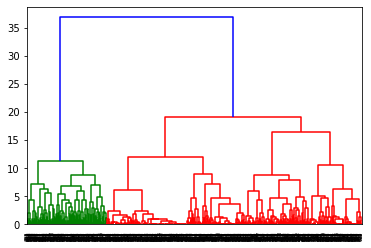

<Figure size 1080x1080 with 0 Axes>

In [37]:
dendo=shc.dendrogram(hierarchy.linkage(x,method='ward'))
plt.figure(figsize=(15,15))
plt.show()

In [38]:
'''from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1.15,min_samples=4)
model=dbscan.fit(x)
labels=model.labels_
print(labels)'''

'from sklearn.cluster import DBSCAN\ndbscan=DBSCAN(eps=1.15,min_samples=4)\nmodel=dbscan.fit(x)\nlabels=model.labels_\nprint(labels)'

#### Silhouette Validation

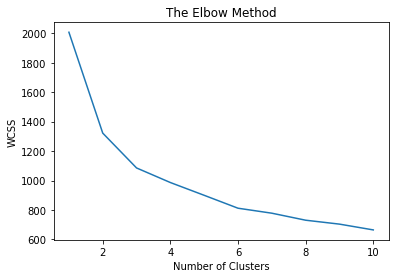

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
range_n_clusters = [2, 3, 4, 5, 6]

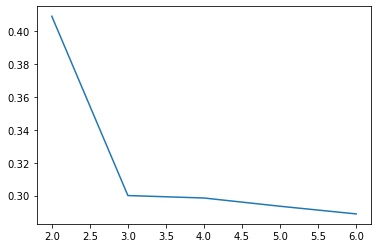

In [57]:
silhouette_avg=[]
sample_silhouette_values=[]
for val in range_n_clusters:
    clusterer = KMeans(n_clusters=val, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg.append(silhouette_score(x, cluster_labels))
    sample_silhouette_values.append(silhouette_samples(x, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg)
plt.show()

clusters count 2 has the highest silhoutte score and it is valid 

In [55]:
silhouette_avg

[0.40925840726245344,
 0.30001249295507304,
 0.29851614508709035,
 0.29349056535755635,
 0.28881973102192054]

In [58]:
sample_silhouette_values

[array([ 0.50625705,  0.32827384,  0.37571374,  0.33831804,  0.58224753,
         0.44075284,  0.2359265 ,  0.4790666 ,  0.36118974,  0.3009916 ,
         0.17935016,  0.31525229,  0.5145663 ,  0.55348839,  0.47875956,
         0.34593082,  0.3613234 ,  0.4289286 ,  0.47441942,  0.36498332,
         0.5221983 ,  0.20500733,  0.33786951,  0.28107351,  0.42361603,
         0.40006139,  0.49356692,  0.2283193 ,  0.33892234,  0.58796331,
         0.30485778,  0.32526998,  0.33896093,  0.43210369,  0.1046267 ,
         0.37557411,  0.4158906 ,  0.51511568,  0.46287102,  0.36051176,
         0.47139271,  0.42742209,  0.49344892,  0.22592275,  0.33880445,
         0.51622825,  0.43329455,  0.33896093,  0.46894867,  0.47420351,
         0.44019938,  0.51514459,  0.30999155,  0.35987538,  0.25148935,
         0.30344814,  0.32871647,  0.4934518 ,  0.27398505,  0.41651788,
         0.49264242,  0.34348921,  0.27386844,  0.42893009,  0.30977652,
         0.39574358,  0.18845937,  0.51389774,  0.3

In [61]:
chk=[]
for val in sample_silhouette_values:
    loc_list=[]
    for ind in val:
        if ind <0.0:
            loc_list.append(1)
    chk.append(loc_list)
print(chk)

[[1], [1], [1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


clusters 2,3 has less no of values whose silhouette score is less than -1